In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [13]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Optical_Ang.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-13-58b231eff6bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-13-58b231eff6bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,43336.727,33569.940,30666.002,29588.512,29435.867,27627.980,42563.790,35676.754,38029.510,39578.520,...,33282.523,23411.719,22318.283,37298.008,47840.426,40303.223,38673.145,33158.820,40910.800,1
1,32834.840,38182.830,35685.100,34116.010,35598.727,33035.520,30562.307,32555.066,29933.047,29475.639,...,33522.780,30990.220,36963.510,41474.000,53753.727,27280.700,34868.440,32564.215,33242.670,1
2,28718.951,31597.617,30235.166,26487.748,31180.646,31568.105,32524.191,32335.613,34583.150,38609.336,...,40954.957,40209.203,36087.785,39053.180,45004.125,40702.950,36783.180,38979.203,34722.004,1
3,39172.766,31761.213,31054.273,29064.910,34773.652,34544.350,29591.220,33338.260,38961.960,41886.742,...,40806.062,35097.125,38056.746,29876.498,35388.530,37137.790,33483.062,39754.902,45856.996,1
4,31926.115,37403.490,40343.105,40755.977,34271.973,36751.010,33900.406,36866.945,43540.008,36312.445,...,40656.645,39760.290,40287.190,36524.500,40956.523,37129.260,40142.766,36176.130,36875.992,1


In [14]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [15]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.5)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6879432624113475
              precision    recall  f1-score   support

          -1       0.81      0.74      0.77       101
           1       0.46      0.55      0.50        40

    accuracy                           0.69       141
   macro avg       0.63      0.65      0.64       141
weighted avg       0.71      0.69      0.70       141



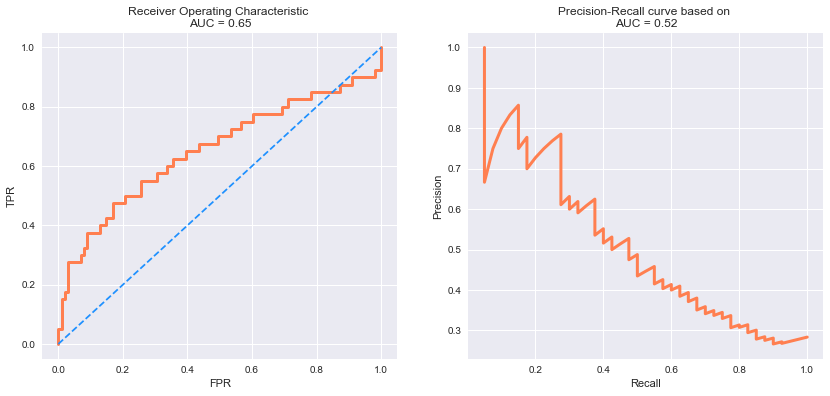

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()